In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

In [267]:
df = yf.download("TSLA", start="2010-01-01", end="2020-04-30")

[*********************100%***********************]  1 of 1 completed


# Putting the strategy together 

In [268]:
# sma short and long
sma_s = 50
sma_l = 200

df['SMA_S'] = df['Close'].rolling(sma_s).mean()
df['SMA_L'] = df['Close'].rolling(sma_l).mean()

df.dropna(inplace=True)

df["isLong"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1)

# Adding returns
df['returns'] = np.log(df['Close'].div(df['Close'].shift(1)))
df['strategy'] = df['isLong'].shift(1) * df['returns']
df.dropna(inplace=True)

df['creturns'] = df['returns'].cumsum().apply(np.exp)
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)

# Optimization

In [269]:
# For optimization
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [270]:
# Creating a test strategy function
def test_strategy(SMA):
    data = df.copy()
    data['returns'] = np.log(data['Close'].div(data['Close'].shift(1)))
    data['SMA_S'] = data['Close'].rolling(int(SMA[0])).mean()
    data['SMA_L'] = data['Close'].rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    
    data['isLong'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
    data['strategy'] = data['isLong'].shift(1) * data['returns']
    data.dropna(inplace=True)
    
    return np.exp(data['strategy'].sum())

In [250]:
test_strategy((50, 200))

4.18527235113864

In [251]:
from itertools import product

In [252]:
# All combinations of SMA_S and SMA_L
combinations = list(product(SMA_S_range, SMA_L_range))

In [253]:
len(combinations)

6080

In [254]:
results = []
for c in combinations:
    results.append(test_strategy(c))

In [255]:
# Results of best performing strategy
np.max(results)

10.977283223387694

In [171]:
combinations[np.argmax(results)] # 32 short 118 long

(32, 118)

In [172]:
all_comb = pd.DataFrame(data=combinations, columns=['SMA_S', 'SMA_L'])

In [173]:
all_comb['Performance'] = results

In [174]:
all_comb

,SMA_S,SMA_L,Performance
0,10,100,0.428729
1,10,101,0.447954
2,10,102,0.323582
3,10,103,0.443223
4,10,104,0.352890
...,...,...,...
6075,49,247,1.142205
6076,49,248,1.268609
6077,49,249,1.405212
6078,49,250,1.690971


In [91]:
# Top 10 strategies
all_comb.nlargest(10, 'Performance')

,SMA_S,SMA_L,Performance
3362,32,118,10.977283
3819,35,119,10.837396
3823,35,123,10.539833
3672,34,124,10.087945
3820,35,120,10.082795
3975,36,123,9.878525
3824,35,124,9.878521
3968,36,116,9.798667
3673,34,125,9.654703
3216,31,124,9.574702


In [92]:
# Top 10 worst strategies
all_comb.nsmallest(10, 'Performance')

,SMA_S,SMA_L,Performance
2,10,102,0.323582
5,10,105,0.344684
4,10,104,0.352890
308,12,104,0.383154
154,11,102,0.385482
159,11,107,0.388856
155,11,103,0.396016
156,11,104,0.411812
309,12,105,0.416000
9,10,109,0.416129


# Working with our best strategy (32, 118)

In [94]:
# sma short and long
sma_s = 32
sma_l = 118

df['SMA_S'] = df['Close'].rolling(sma_s).mean()
df['SMA_L'] = df['Close'].rolling(sma_l).mean()

df.dropna(inplace=True)

df["isLong"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1)

# Adding returns
df['returns'] = np.log(df['Close'].div(df['Close'].shift(1)))
df['strategy'] = df['isLong'].shift(1) * df['returns']
df.dropna(inplace=True)

df['creturns'] = df['returns'].cumsum().apply(np.exp)
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)

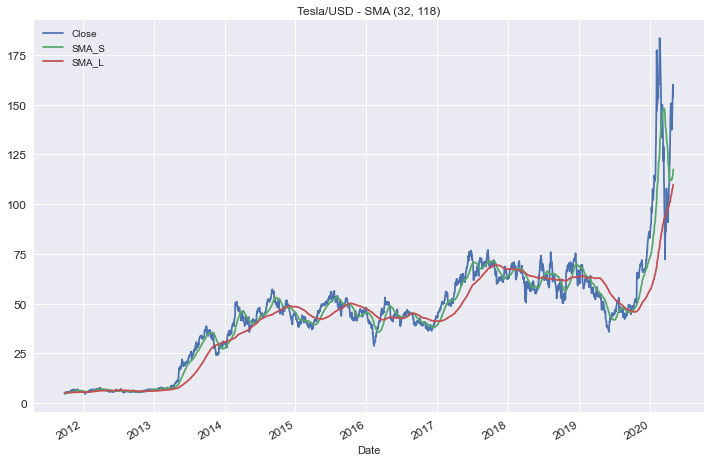

In [98]:
df[['Close', 'SMA_S', 'SMA_L']].plot(figsize=(12,8), title="Tesla/USD - SMA (32, 118)", fontsize=12)
plt.legend()
plt.show()

In [99]:
df['creturns'] = df['returns'].cumsum().apply(np.exp)
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)

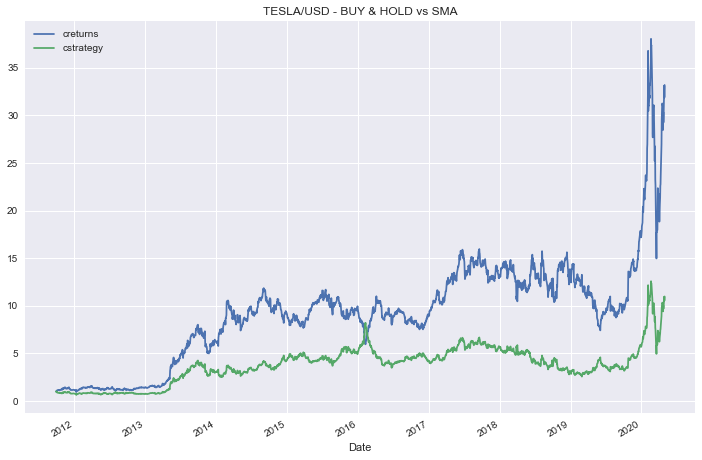

In [100]:
df[['creturns', 'cstrategy']].plot(figsize=(12,8), title="TESLA/USD - BUY & HOLD vs SMA")
plt.legend()
plt.show()